<a href="https://colab.research.google.com/github/pdrzxzz/who-suicide-analysis/blob/main/who_suicides_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mticker
import kagglehub

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)
pd.options.display.float_format = '{:,.2f}'.format


# FETCH DATA

In [33]:
path = kagglehub.dataset_download("szamil/who-suicide-statistics")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, 'who_suicide_statistics.csv'))

Path to dataset files: /kaggle/input/who-suicide-statistics


# GLANCE OF DATA

In [34]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,"277,900.00"
1,Albania,1985,female,25-34 years,NaN,"246,800.00"
2,Albania,1985,female,35-54 years,NaN,"267,500.00"
3,Albania,1985,female,5-14 years,NaN,"298,300.00"
4,Albania,1985,female,55-74 years,NaN,"138,700.00"


In [35]:
df['year'].value_counts().sort_values(ascending=True).head()

,count
year,
2016,300
1979,672
1980,804
1984,840
1982,936


In [36]:
df = df[df['year'] != 2016]

2016 has few data.

In [37]:
print(f"Number of countries: {len(df['country'].unique())}")
print(f"Data from {df['year'].min()} to {df['year'].max()}")
YEAR_RANGE = f"{df['year'].min()} to {df['year'].max()}"

Number of countries: 141
Data from 1979 to 2015


In [38]:
age_values = df['age'].unique()
age_values = np.insert(age_values, 0, age_values[3])
age_values = np.delete(age_values, 4)
df['age'] = pd.Categorical(df['age'], categories=age_values, ordered=True)
df['sex'] = pd.Categorical(df['sex'])
for x in age_values:
  print(x)

5-14 years
15-24 years
25-34 years
35-54 years
55-74 years
75+ years


/tmp/ipython-input-38-2997097332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.Categorical(df['age'], categories=age_values, ordered=True)
/tmp/ipython-input-38-2997097332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = pd.Categorical(df['sex'])


In [39]:
df['suicides_no/100kpop'] = (df.loc[:, 'suicides_no'] * 100000) / df.loc[:, 'population']
df['suicides_no/100kpop']

/tmp/ipython-input-39-874627757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['suicides_no/100kpop'] = (df.loc[:, 'suicides_no'] * 100000) / df.loc[:, 'population']


,suicides_no/100kpop
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
43771,NaN
43772,NaN
43773,NaN
43774,NaN


In [40]:
print(f"The dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

The dataset contains 43,476 rows and 7 columns.


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43476 entries, 0 to 43775
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   country              43476 non-null  object  
 1   year                 43476 non-null  int64   
 2   sex                  43476 non-null  category
 3   age                  43476 non-null  category
 4   suicides_no          41256 non-null  float64 
 5   population           38064 non-null  float64 
 6   suicides_no/100kpop  35844 non-null  float64 
dtypes: category(2), float64(3), int64(1), object(1)
memory usage: 2.1+ MB


In [42]:
df.describe()

,year,suicides_no,population,suicides_no/100kpop
count,"43,476.00","41,256.00","38,064.00","35,844.00"
mean,"1,998.38",194.15,"1,661,304.03",13.19
std,10.27,803.00,"3,627,930.06",19.92
min,"1,979.00",0.00,259.00,0.00
25%,"1,990.00",1.00,"84,901.75",0.78
50%,"1,999.00",14.00,"380,638.50",5.98
75%,"2,007.00",91.00,"1,307,963.50",17.01
max,"2,015.00","22,338.00","43,805,214.00",300.75


# DATA CLEANING

## Null values

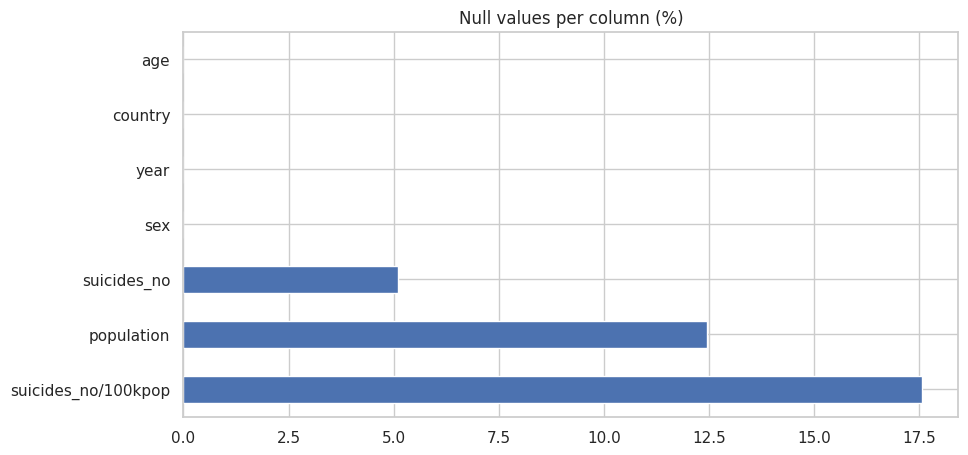

In [43]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).plot.barh()
plt.title('Null values per column (%)')
plt.show()

In [44]:
df = df.dropna()

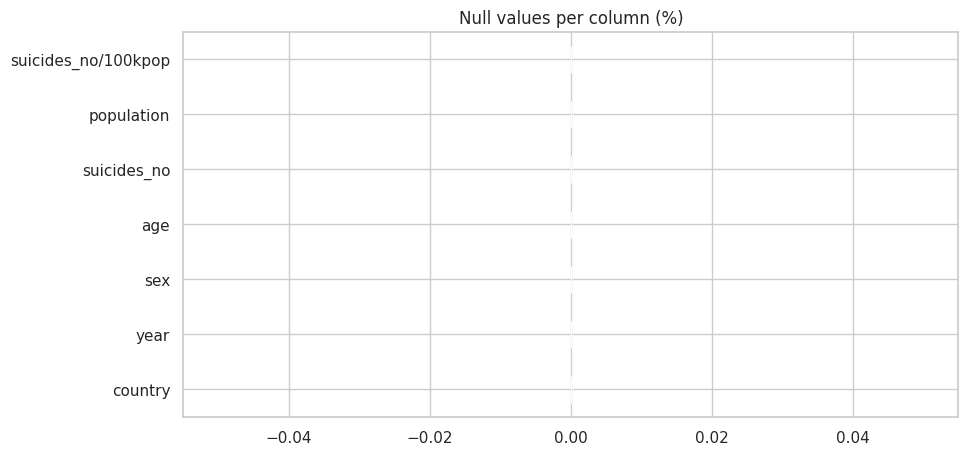

In [45]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).plot.barh()
plt.title('Null values per column (%)')
plt.show()

In [46]:
df['suicides_no'] = df.loc[:, 'suicides_no'].astype(int)
df['population'] = df.loc[:, 'population'].astype(int)

In [47]:
print(f"The dataset now contains {df.shape[0]:,} rows (7716 rows dropped)")

The dataset now contains 35,844 rows (7716 rows dropped)


Any duplicated rows?

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.dtypes

,0
country,object
year,int64
sex,category
age,category
suicides_no,int64
population,int64
suicides_no/100kpop,float64


In [50]:
df['sex'].value_counts(normalize=True)

,proportion
sex,
female,0.50
male,0.50


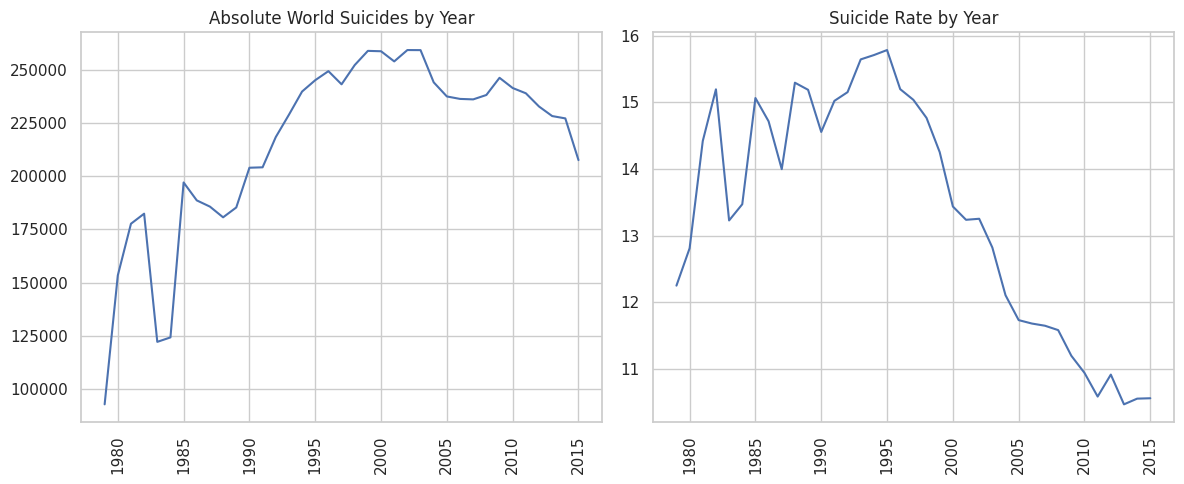

In [51]:
# 1. Absolute and Rate Suicides by Year
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
df_grouped = df.groupby('year')['suicides_no/100kpop'].mean().reset_index()

sns.lineplot(x=df.groupby("year")["suicides_no"].sum().index, y=df.groupby("year")["suicides_no"].sum().values, ax=ax1)
ax1.set_title("Absolute World Suicides by Year")
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.lineplot(x='year', y='suicides_no/100kpop', data=df_grouped, ax=ax2)
ax2.set_title("Suicide Rate by Year")
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()

Plot Analysis: The suicide rate began to fall significantly since around 1995.

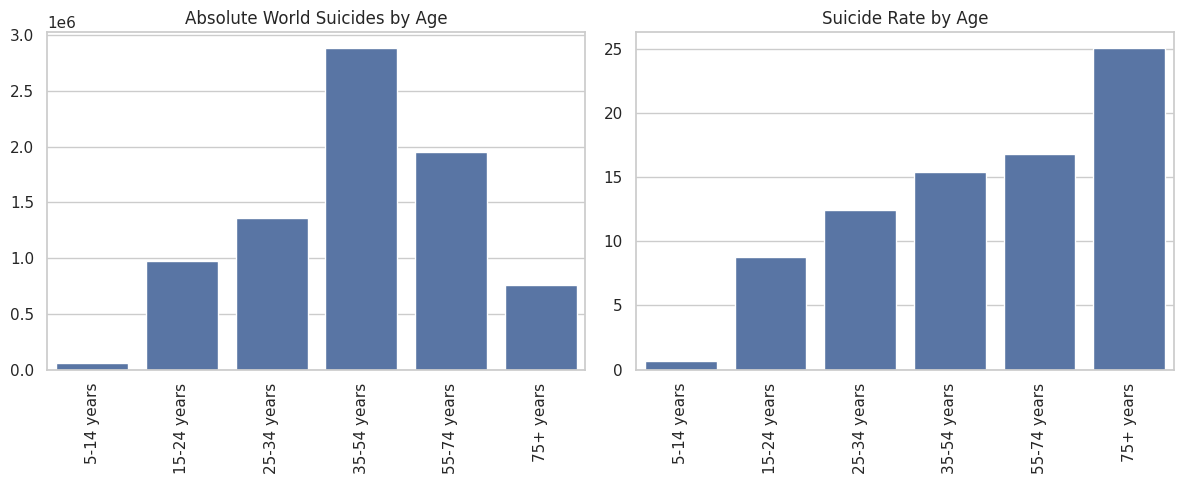

In [52]:
# 2. Absolute and Rate Suicides by Age
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))
df_grouped = df.groupby('age', observed=True)['suicides_no/100kpop'].mean().reset_index()

sns.barplot(x=df.groupby("age", observed=True)["suicides_no"].sum().index, y=df.groupby("age", observed=True)["suicides_no"].sum().values, ax=ax3)
ax3.set_title("Absolute World Suicides by Age")
ax3.tick_params(axis='x', rotation=90)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.barplot(x='age', y='suicides_no/100kpop', data=df_grouped, ax=ax4)
ax4.set_title("Suicide Rate by Age")
ax4.tick_params(axis='x', rotation=90)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

In [53]:
df_grouped

,age,suicides_no/100kpop
0,5-14 years,0.63
1,15-24 years,8.81
2,25-34 years,12.44
3,35-54 years,15.42
4,55-74 years,16.81
5,75+ years,25.05


In [69]:
df_grouped

,country,suicides_no/100kpop
0,Hungary,40.20
1,Lithuania,39.06
2,Sri Lanka,37.78
3,Russian Federation,35.21
4,Latvia,32.48
5,Slovenia,31.01
6,Estonia,30.63
7,Kazakhstan,30.22
8,Belarus,29.48
9,Ukraine,26.65


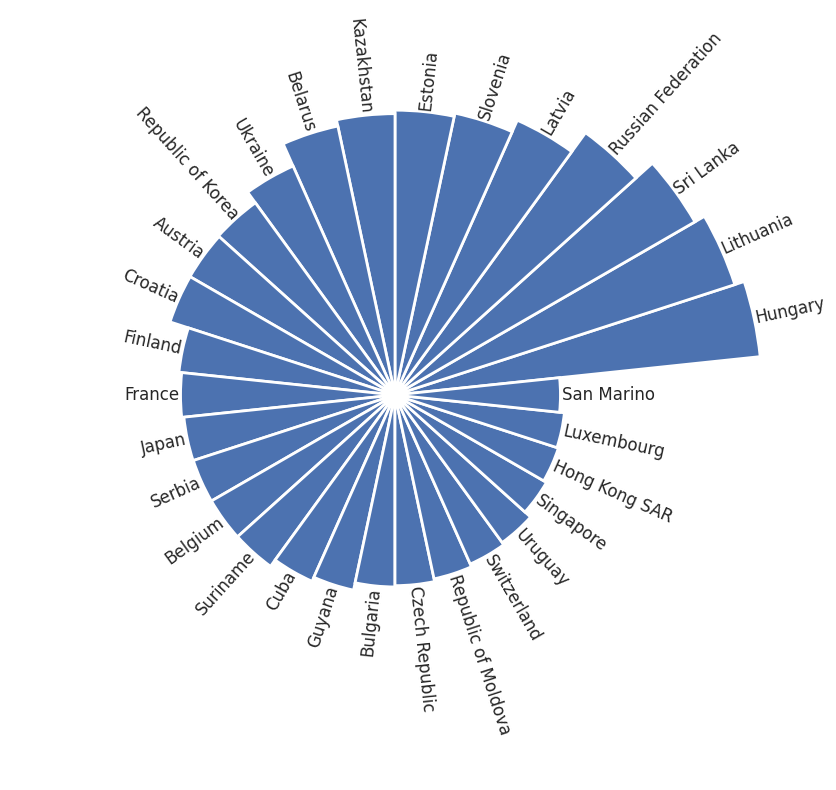

In [84]:
df_grouped = df.groupby('country')['suicides_no/100kpop'].mean().nlargest(30).reset_index()

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1000
lowerLimit = 30

max = df_grouped['suicides_no/100kpop'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (upperLimit - lowerLimit) / max
heights = slope * df_grouped['suicides_no/100kpop'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_grouped.index)

indexes = list(range(1, len(df_grouped.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_grouped["country"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor")

Plot Analysis: The majority of suicides are by adults (35-54 years).
The suicide risk increases with age.

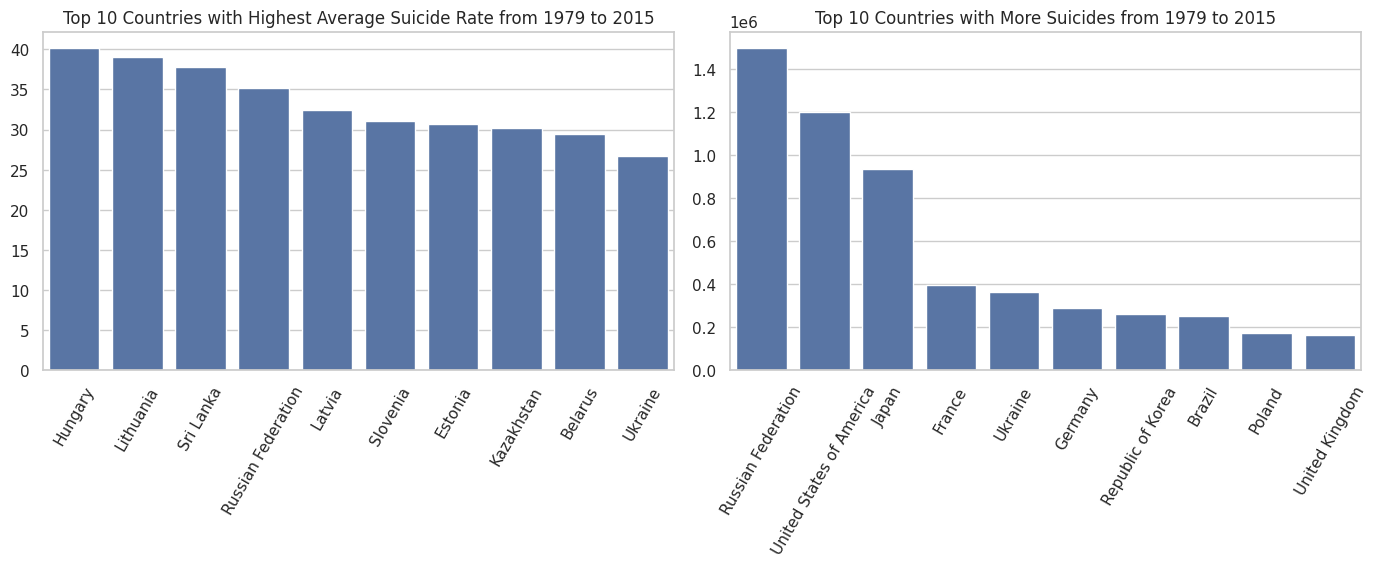

In [55]:
# 3. Top 10 Countries by Rate and Absolute Suicides
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(14, 6))
df_grouped = df.groupby('country')['suicides_no/100kpop'].mean().nlargest(10).reset_index()

sns.barplot(x='country', y='suicides_no/100kpop', data=df_grouped, ax=ax5)
ax5.set_title(f"Top 10 Countries with Highest Average Suicide Rate from {YEAR_RANGE}")
ax5.tick_params(axis='x', rotation=60)
ax5.set_xlabel("")
ax5.set_ylabel("")

sns.barplot(x=df.groupby("country")["suicides_no"].sum().nlargest(10).index,
            y=df.groupby("country")["suicides_no"].sum().nlargest(10).values, ax=ax6)
ax6.set_title(f"Top 10 Countries with More Suicides from {YEAR_RANGE}")
ax6.tick_params(axis='x', rotation=60)
ax6.set_xlabel("")
ax6.set_ylabel("")

plt.tight_layout()
plt.show()

Plot analysis: Countries with the highest Suicide Rate are mostly in Europe and Asia.



In [56]:
highest_rate_countries = df.groupby('country')[['suicides_no', 'population', 'suicides_no/100kpop']].mean().nlargest(10, columns='suicides_no/100kpop').reset_index()
for index, country in highest_rate_countries.iterrows():
  total_population = country['population']
  total_suicides = country['suicides_no']

  ratio = total_population / total_suicides
  print(f"1 suicide per {int(ratio):,} people in {country['country']}")

1 suicide per 2,802 people in Hungary
1 suicide per 2,556 people in Lithuania
1 suicide per 3,081 people in Sri Lanka
1 suicide per 3,069 people in Russian Federation
1 suicide per 3,255 people in Latvia
1 suicide per 3,509 people in Slovenia
1 suicide per 3,476 people in Estonia
1 suicide per 3,863 people in Kazakhstan
1 suicide per 3,488 people in Belarus
1 suicide per 4,036 people in Ukraine


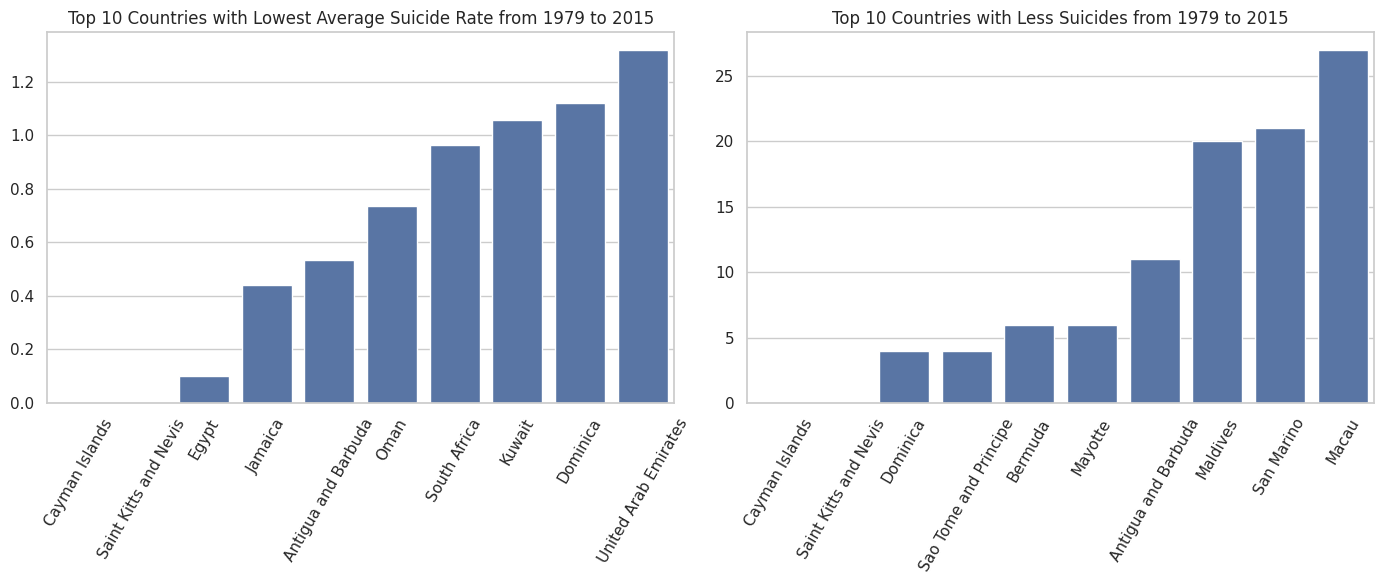

In [57]:
# 3. Top 10 Countries by Rate and Absolute Suicides
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(14, 6))
df_grouped = df.groupby('country')['suicides_no/100kpop'].mean().nsmallest(10).reset_index()

sns.barplot(x='country', y='suicides_no/100kpop', data=df_grouped, ax=ax5)
ax5.set_title(f"Top 10 Countries with Lowest Average Suicide Rate from {YEAR_RANGE}")
ax5.tick_params(axis='x', rotation=60)
ax5.set_xlabel("")
ax5.set_ylabel("")

sns.barplot(x=df.groupby("country")["suicides_no"].sum().nsmallest(10).index,
            y=df.groupby("country")["suicides_no"].sum().nsmallest(10).values, ax=ax6)
ax6.set_title(f"Top 10 Countries with Less Suicides from {YEAR_RANGE}")
ax6.tick_params(axis='x', rotation=60)
ax6.set_xlabel("")
ax6.set_ylabel("")

plt.tight_layout()
plt.show()

Plot analysis: Countries with the lowest Suicide Rate are mostly in Africa, Caribe and Middle East.

In [58]:
lowest_rate_countries = df.groupby('country')[['suicides_no', 'population', 'suicides_no/100kpop']].mean().nsmallest(10, columns='suicides_no/100kpop').reset_index()
for index, country in lowest_rate_countries.iterrows():
  total_population = country['population']
  total_suicides = country['suicides_no']
  if(total_suicides != 0):
    ratio = total_population / total_suicides

    print(f"1 suicide per {int(ratio):,} people in {country['country']}")

1 suicide per 986,238 people in Egypt
1 suicide per 248,397 people in Jamaica
1 suicide per 186,810 people in Antigua and Barbuda
1 suicide per 272,335 people in Oman
1 suicide per 119,263 people in South Africa
1 suicide per 63,890 people in Kuwait
1 suicide per 95,425 people in Dominica
1 suicide per 58,685 people in United Arab Emirates


In [59]:
df[df['country'] == 'Egypt']['population'].max()

9925226

Egypt population seems to be miscalculated.

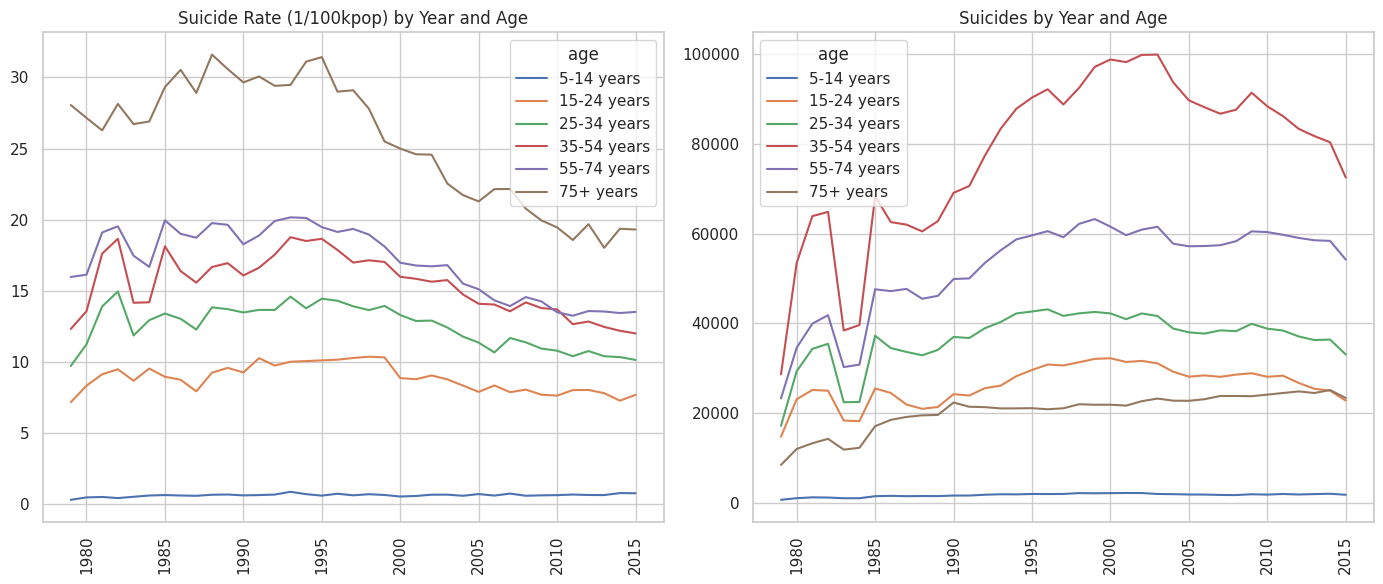

In [60]:
# 4. Suicides by Year and Sex (Rate and Absolute)
fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(14, 6))
df_grouped_rate = df.groupby(['year', 'age'], observed=True)['suicides_no/100kpop'].mean().reset_index()
df_grouped_abs = df.groupby(['year', 'age'], observed=True)['suicides_no'].sum().reset_index()

sns.lineplot(x='year', y='suicides_no/100kpop', hue='age', data=df_grouped_rate, ax=ax7)
ax7.set_title("Suicide Rate (1/100kpop) by Year and Age")
ax7.tick_params(axis='x', rotation=90)
ax7.set_xlabel("")
ax7.set_ylabel("")

sns.lineplot(x='year', y='suicides_no', hue='age', data=df_grouped_abs, ax=ax8)
ax8.set_title("Suicides by Year and Age")
ax8.tick_params(axis='x', rotation=90)
ax8.set_xlabel("")
ax8.set_ylabel("")

plt.tight_layout()
plt.show()

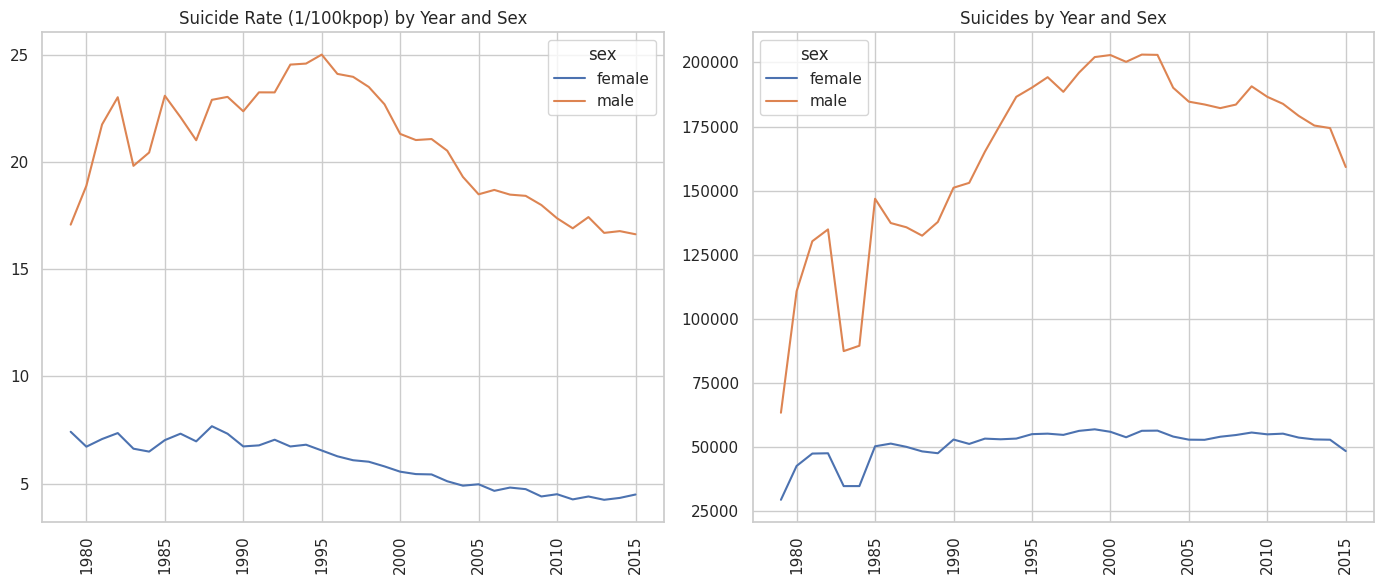

In [61]:
# 4. Suicides by Year and Sex (Rate and Absolute)
fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(14, 6))
df_grouped_rate = df.groupby(['year', 'sex'], observed=True)['suicides_no/100kpop'].mean().reset_index()
df_grouped_abs = df.groupby(['year', 'sex'], observed=True)['suicides_no'].sum().reset_index()

sns.lineplot(x='year', y='suicides_no/100kpop', hue='sex', data=df_grouped_rate, ax=ax7)
ax7.set_title("Suicide Rate (1/100kpop) by Year and Sex")
ax7.tick_params(axis='x', rotation=90)
ax7.set_xlabel("")
ax7.set_ylabel("")

sns.lineplot(x='year', y='suicides_no', hue='sex', data=df_grouped_abs, ax=ax8)
ax8.set_title("Suicides by Year and Sex")
ax8.tick_params(axis='x', rotation=90)
ax8.set_xlabel("")
ax8.set_ylabel("")

plt.tight_layout()
plt.show()

Plot analysis: There isn't a year that females tend to suicide more than males.

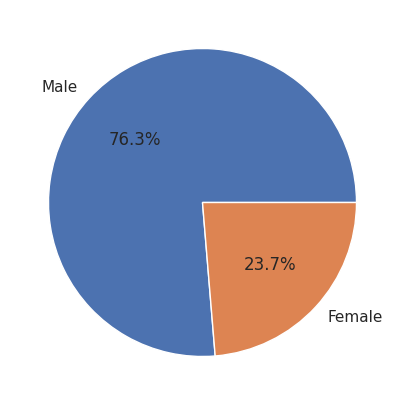

In [62]:
no_female_suicides = df[df['sex'] == 'female']['suicides_no'].sum()
no_male_suicides = df[df['sex'] == 'male']['suicides_no'].sum()

plt.pie([no_male_suicides, no_female_suicides], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.show()

In [63]:
ratio = no_male_suicides / no_female_suicides
print(f"Men suicides occurs about {ratio:.2f}x more than women")

Men suicides occurs about 3.22x more than women


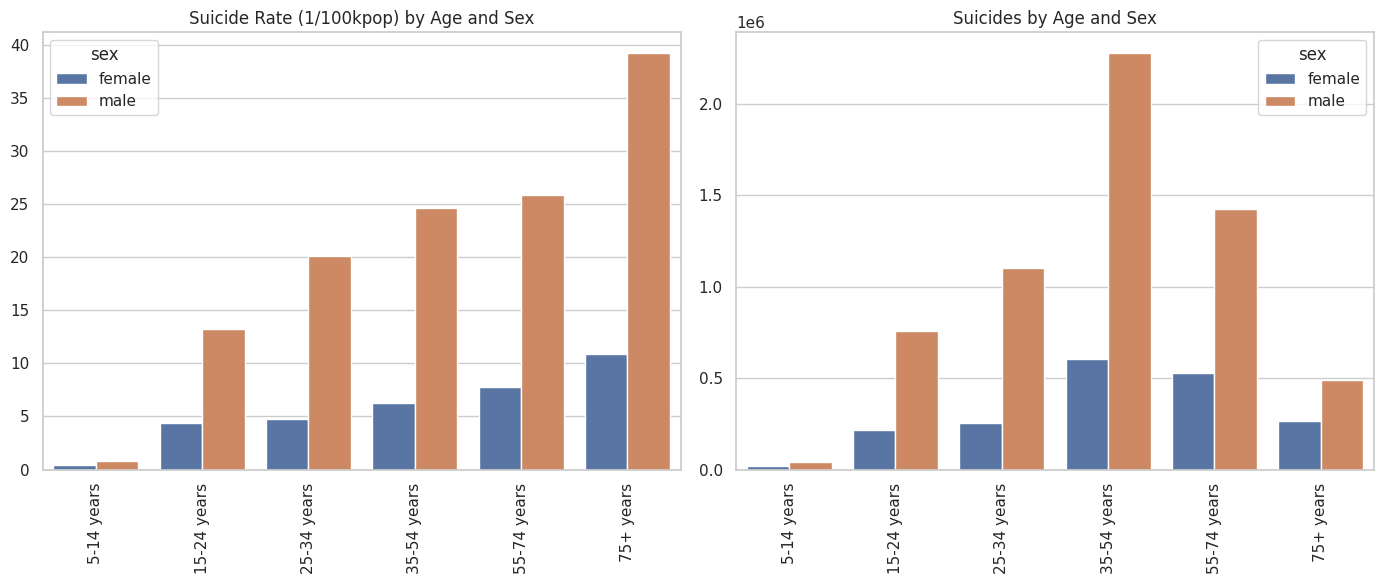

In [64]:
# 4. Suicides by Year and Sex (Rate and Absolute)
fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(14, 6))
df_grouped_rate = df.groupby(['age', 'sex'], observed=True)['suicides_no/100kpop'].mean().reset_index()
df_grouped_abs = df.groupby(['age', 'sex'], observed=True)['suicides_no'].sum().reset_index()

sns.barplot(x='age', y='suicides_no/100kpop', hue='sex', data=df_grouped_rate, ax=ax7)
ax7.set_title("Suicide Rate (1/100kpop) by Age and Sex")
ax7.tick_params(axis='x', rotation=90)
ax7.set_xlabel("")
ax7.set_ylabel("")

sns.barplot(x='age', y='suicides_no', hue='sex', data=df_grouped_abs, ax=ax8)
ax8.set_title("Suicides by Age and Sex")
ax8.tick_params(axis='x', rotation=90)
ax8.set_xlabel("")
ax8.set_ylabel("")

plt.tight_layout()
plt.show()

Plot Analysis: There aren't a age group that the difference of male and females grows significantly.

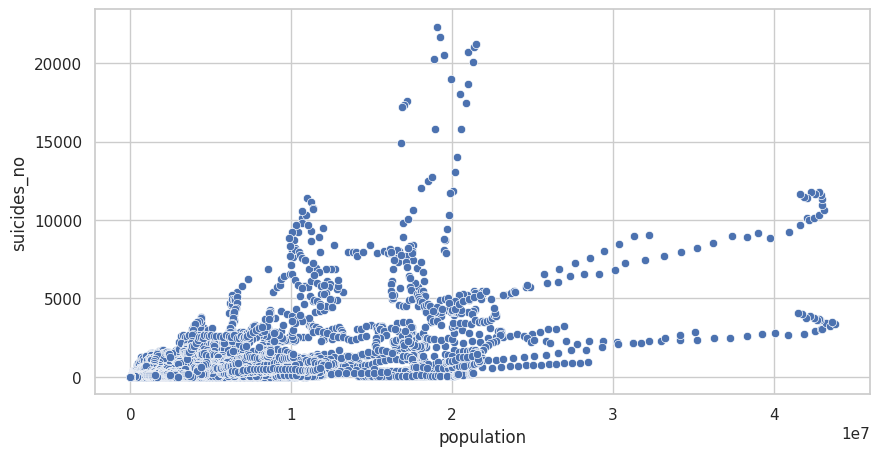

In [65]:
sns.scatterplot(x='population', y='suicides_no', data=df)
plt.show()

Plot Analysis: Oh, this chart is quite surprising — it seems that we have three distinct clusters when comparing the suicide rate with the population and the absolute number of suicides. I wonder why this separation is so well-defined...